## *SIGNAL DECAY ANALYSIS* 

In [1]:
import pandas as pd
df = pd.read_csv('allsignal_20.csv.gz', compression = 'gzip')

In [2]:
df

,permno,yyyymm,XFIN,TrendFactor,NetEquityFinance,TotalAccruals,grcapx,RDS,MomOffSeason06YrPlus,roaq,...,InvestPPEInv,hire,DelDRC,retConglomerate,CustomerMomentum,MomSeason16YrPlus,IndMom,betaVIX,IntanEP,DelLTI
0,10001,199901,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,-0.027581,-0.016140,...,-0.003704,0.158491,NaN,-0.009186,NaN,NaN,0.102473,0.000048,0.099803,0.001519
1,10001,199902,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,-0.022359,-0.016140,...,-0.003704,0.158491,NaN,-0.047183,NaN,NaN,0.049211,0.000155,0.124949,0.001519
2,10001,199903,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,-0.020457,0.016069,...,-0.003704,0.158491,NaN,0.007086,NaN,NaN,-0.066548,-0.010097,0.149366,0.001519
3,10001,199904,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,-0.020823,0.016069,...,-0.003704,0.158491,NaN,0.042973,NaN,NaN,-0.074677,-0.003417,0.109955,0.001519
4,10001,199905,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,-0.018150,0.016069,...,-0.003704,0.158491,NaN,0.048538,NaN,NaN,0.005686,-0.003171,0.109856,0.001519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694564,93436,202308,0.040382,0.133927,-0.007489,-0.223286,-1.216275,-260122.58,-0.019062,0.030521,...,-0.247043,-0.251513,0.006064,-0.078938,0.023122,NaN,0.247524,-0.009743,NaN,-0.019852
1694565,93436,202309,0.040382,0.155592,-0.007489,-0.223286,-1.216275,-260122.58,-0.020852,0.031129,...,-0.247043,-0.251513,0.006064,-0.022955,0.054521,NaN,0.178126,-0.027900,NaN,-0.019852
1694566,93436,202310,0.040382,0.152258,-0.007489,-0.223286,-1.216275,-260122.58,-0.025114,0.031129,...,-0.247043,-0.251513,0.006064,-0.139206,-0.025424,NaN,0.232628,0.011033,-2.853455,-0.019852
1694567,93436,202311,0.040382,0.086506,-0.007489,-0.223286,-1.216275,-260122.58,-0.021164,0.031129,...,-0.247043,-0.251513,0.006064,0.012961,0.083343,NaN,-0.006187,-0.013998,-2.332660,-0.019852


In [3]:
crsp = pd.read_csv('crsp_data.csv')

In [4]:
crsp

,permno,date,ret
0,10000,1986-01-31,NaN
1,10000,1986-02-28,-25.7143
2,10000,1986-03-31,36.5385
3,10000,1986-04-30,-9.8592
4,10000,1986-05-30,-22.2656
...,...,...,...
4047625,93436,2024-08-30,-7.7391
4047626,93436,2024-09-30,22.1942
4047627,93436,2024-10-31,-4.5025
4047628,93436,2024-11-29,38.1469


In [5]:
import pandas as pd

# fix date type
crsp['date'] = pd.to_datetime(crsp['date'])   
crsp['yyyymm'] = crsp['date'].dt.year * 100 + crsp['date'].dt.month  

crsp['permno'] = crsp['permno'].astype('int64')
crsp['yyyymm'] = crsp['yyyymm'].astype('int64')

df['permno'] = df['permno'].astype('int64')
df['yyyymm'] = df['yyyymm'].astype('int64')

merged_df = pd.merge(crsp, df, on=["permno", "yyyymm"], how="inner")
merged_df = merged_df.dropna(subset=["ret"])
merged_df

,permno,date,ret,yyyymm,XFIN,TrendFactor,NetEquityFinance,TotalAccruals,grcapx,RDS,...,InvestPPEInv,hire,DelDRC,retConglomerate,CustomerMomentum,MomSeason16YrPlus,IndMom,betaVIX,IntanEP,DelLTI
0,10001,1999-01-29,0.0000,199901,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,...,-0.003704,0.158491,NaN,-0.009186,NaN,NaN,0.102473,0.000048,0.099803,0.001519
1,10001,1999-02-26,-9.0909,199902,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,...,-0.003704,0.158491,NaN,-0.047183,NaN,NaN,0.049211,0.000155,0.124949,0.001519
2,10001,1999-03-31,1.3143,199903,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,...,-0.003704,0.158491,NaN,0.007086,NaN,NaN,-0.066548,-0.010097,0.149366,0.001519
3,10001,1999-04-30,1.4286,199904,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,...,-0.003704,0.158491,NaN,0.042973,NaN,NaN,-0.074677,-0.003417,0.109955,0.001519
4,10001,1999-05-28,-2.1127,199905,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,...,-0.003704,0.158491,NaN,0.048538,NaN,NaN,0.005686,-0.003171,0.109856,0.001519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694564,93436,2023-08-31,-3.4962,202308,0.040382,0.133927,-0.007489,-0.223286,-1.216275,-260122.58,...,-0.247043,-0.251513,0.006064,-0.078938,0.023122,NaN,0.247524,-0.009743,NaN,-0.019852
1694565,93436,2023-09-29,-3.0456,202309,0.040382,0.155592,-0.007489,-0.223286,-1.216275,-260122.58,...,-0.247043,-0.251513,0.006064,-0.022955,0.054521,NaN,0.178126,-0.027900,NaN,-0.019852
1694566,93436,2023-10-31,-19.7346,202310,0.040382,0.152258,-0.007489,-0.223286,-1.216275,-260122.58,...,-0.247043,-0.251513,0.006064,-0.139206,-0.025424,NaN,0.232628,0.011033,-2.853455,-0.019852
1694567,93436,2023-11-30,19.5379,202311,0.040382,0.086506,-0.007489,-0.223286,-1.216275,-260122.58,...,-0.247043,-0.251513,0.006064,0.012961,0.083343,NaN,-0.006187,-0.013998,-2.332660,-0.019852


In [6]:
merged_df.columns

Index(['permno', 'date', 'ret', 'yyyymm', 'XFIN', 'TrendFactor',
       'NetEquityFinance', 'TotalAccruals', 'grcapx', 'RDS',
       'MomOffSeason06YrPlus', 'roaq', 'NetDebtFinance', 'InvGrowth',
       'InvestPPEInv', 'hire', 'DelDRC', 'retConglomerate', 'CustomerMomentum',
       'MomSeason16YrPlus', 'IndMom', 'betaVIX', 'IntanEP', 'DelLTI'],
      dtype='object')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

df = merged_df.copy()
df = df.sort_values(['permno', 'date'])
df['ret_1m_fwd'] = df.groupby('permno')['ret'].shift(-1)
df['ret_3m_fwd'] = df.groupby('permno')['ret'].rolling(3, min_periods=1).sum().shift(-3).reset_index(0, drop=True)
df['ret_6m_fwd'] = df.groupby('permno')['ret'].rolling(6, min_periods=1).sum().shift(-6).reset_index(0, drop=True)

signals = [
    'XFIN', 'TrendFactor', 'NetEquityFinance', 'TotalAccruals', 'grcapx',
    'RDS', 'MomOffSeason06YrPlus', 'roaq', 'NetDebtFinance', 'InvGrowth',
    'InvestPPEInv', 'hire', 'DelDRC', 'retConglomerate', 'CustomerMomentum',
    'MomSeason16YrPlus', 'IndMom', 'betaVIX', 'IntanEP', 'DelLTI'
]

results = []

for signal in signals:
    ic_1m_list = []
    ic_3m_list = []
    ic_6m_list = []
    
    grouped = df[['yyyymm', signal, 'ret_1m_fwd', 'ret_3m_fwd', 'ret_6m_fwd']].dropna().groupby('yyyymm')
    
    for yyyymm, group in grouped:
        x = group[signal]
        ic_1m, _ = spearmanr(x, group['ret_1m_fwd'])
        ic_3m, _ = spearmanr(x, group['ret_3m_fwd'])
        ic_6m, _ = spearmanr(x, group['ret_6m_fwd'])
        ic_1m_list.append(ic_1m)
        ic_3m_list.append(ic_3m)
        ic_6m_list.append(ic_6m)
    
    results.append({
        'Signal': signal,
        'IC_1m_mean': np.nanmean(ic_1m_list),
        'IC_3m_mean': np.nanmean(ic_3m_list),
        'IC_6m_mean': np.nanmean(ic_6m_list),
        'IC_1m_std': np.nanstd(ic_1m_list),
        'IC_3m_std': np.nanstd(ic_3m_list),
        'IC_6m_std': np.nanstd(ic_6m_list)
    })

decay_df = pd.DataFrame(results)

# Add IC_avg column (mean across 1m, 3m, and 6m)
decay_df['IC_avg'] = decay_df[['IC_1m_mean', 'IC_3m_mean', 'IC_6m_mean']].mean(axis=1)

# Select top signals based on IC_avg
top_n = 5
top_signals = decay_df.sort_values('IC_avg', ascending=False).head(top_n)['Signal'].tolist()

In [8]:
decay_df

,Signal,IC_1m_mean,IC_3m_mean,IC_6m_mean,IC_1m_std,IC_3m_std,IC_6m_std,IC_avg
0,XFIN,0.029931,0.033091,0.036421,0.064131,0.064651,0.061248,0.033148
1,TrendFactor,0.040107,0.034163,0.029684,0.107038,0.104475,0.102718,0.034651
2,NetEquityFinance,0.039729,0.030166,0.025457,0.093796,0.099250,0.095324,0.031784
3,TotalAccruals,-0.009715,0.001814,0.013516,0.053613,0.054943,0.055282,0.001872
4,grcapx,0.001349,0.008006,0.016617,0.049774,0.054374,0.054030,0.008657
5,RDS,-0.012736,-0.002435,0.006980,0.062409,0.065675,0.065343,-0.002730
6,MomOffSeason06YrPlus,0.013581,0.017422,0.021558,0.063983,0.068149,0.067665,0.017520
7,roaq,0.047420,0.038368,0.027039,0.094209,0.101058,0.096799,0.037609
8,NetDebtFinance,0.004519,0.012129,0.017585,0.036346,0.041520,0.045151,0.011411
9,InvGrowth,0.003809,0.013099,0.020966,0.054823,0.058512,0.059158,0.012625


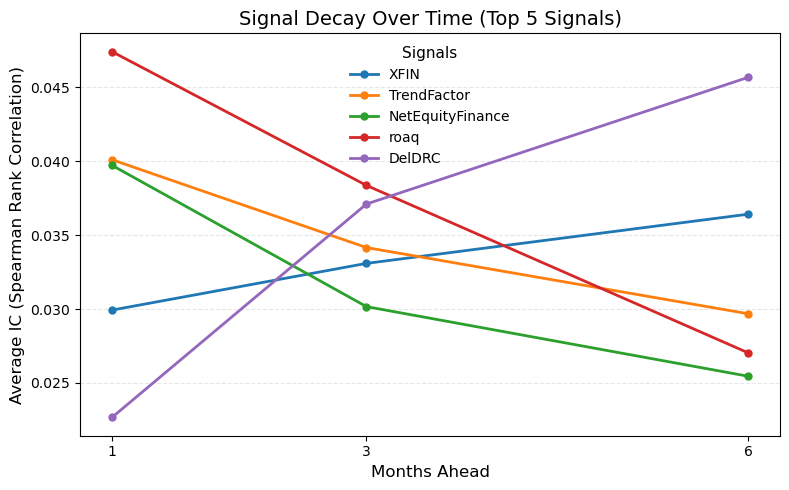

In [9]:
plt.figure(figsize=(8, 5))

for idx, row in decay_df[decay_df['Signal'].isin(top_signals)].iterrows():
    ic_means = [row['IC_1m_mean'], row['IC_3m_mean'], row['IC_6m_mean']]
    plt.plot(
        [1, 3, 6],
        ic_means,
        marker='o',
        linestyle='-',
        linewidth=2,
        markersize=5,
        label=row['Signal']
    )

plt.xticks([1, 3, 6])
plt.xlabel('Months Ahead', fontsize=12)
plt.ylabel('Average IC (Spearman Rank Correlation)', fontsize=12)
plt.title(f'Signal Decay Over Time (Top {top_n} Signals)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(
    title='Signals',
    title_fontsize='11',
    fontsize='10',
    loc='best',
    frameon=False
)
plt.tight_layout()
plt.show()


# Signal Decay Analysis Summary

## Graph Overview
The graph illustrates the signal decay patterns for the top five financial signals, evaluated based on their Spearman Rank Correlation (IC) with future stock returns over 1-month, 3-month, and 6-month horizons.

## Key Observations

| Signal | Behavior | Interpretation |
|:--------|:---------|:----------------|
| **XFIN** | IC **increases** over time | Indicates that external financing activity becomes **more predictive** over longer holding periods. |
| **TrendFactor** | IC **decreases moderately** | Maintains reasonable predictive power across 6 months, suitable for **medium-term strategies**. |
| **NetEquityFinance** | IC **declines steadily** | Predictive strength fades over time; better for **short-term stock selection**. |
| **roaq** | IC **declines sharply** | Very strong short-term predictor, but effectiveness **diminishes rapidly** after 1 month. |
| **retConglomerate** | IC **consistently weakens** | Shows the lowest predictive power overall, with a steady decay over time. |

## Overall Conclusions
- **XFIN** is the most promising for **long-term investment horizons**.
- **roaq** offers strong opportunities for **short-term trading**.
- **TrendFactor** is relatively stable, supporting **medium-term portfolio construction**.
- **NetEquityFinance** and **retConglomerate** show weaker and diminishing predictive abilities, and may require combination with other signals for effective use.

## Practical Implications
Understanding signal decay helps align trading strategies with the appropriate investment horizon. Combining fast-decaying signals (like **roaq**) with slower-decaying signals (like **XFIN**) could enhance portfolio stability and performance across different timeframes.
